In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#1. Loading the data and setting date to be the index column

df = pd.read_csv('pageviews.csv', index_col= 'date', parse_dates= True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.columns
print(type(df.index))
df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
#2. Clean and filter the data

df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [6]:
print(df['value'].head())
df['value'].dtype

date
2016-05-19    19736
2016-05-26    18060
2016-05-27    19997
2016-05-28    19044
2016-05-29    20325
Name: value, dtype: int64


dtype('int64')

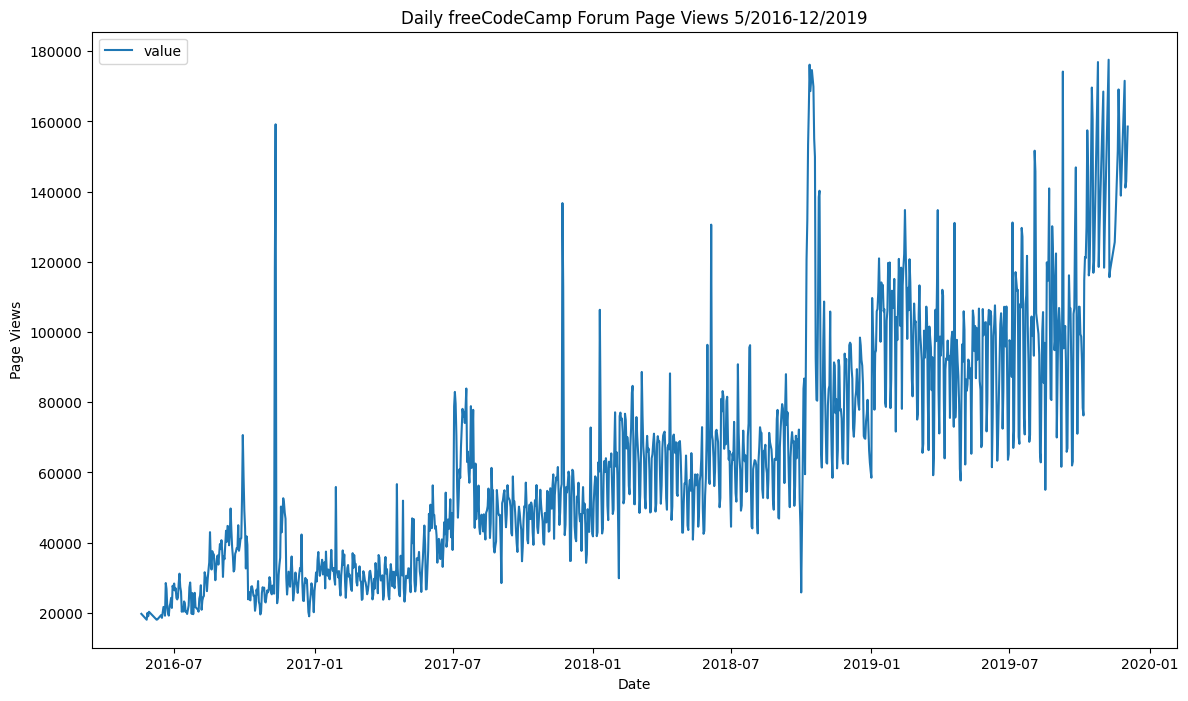

In [68]:
#3. Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(df)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()



In [8]:
df_clone = df.copy()

In [12]:
df_clone

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [18]:
df_clone['Year'] = df_clone.index.year
df_clone['Month'] = df_clone.index.month_name()

In [46]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']


In [56]:
df_clone['Month'] = pd.Categorical(df_clone['Month'], categories= month_order, ordered= True)

In [61]:
grouped_df = df_clone.groupby(['Year', 'Month'], observed= True)['value'].mean().unstack()

In [65]:
grouped_df

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


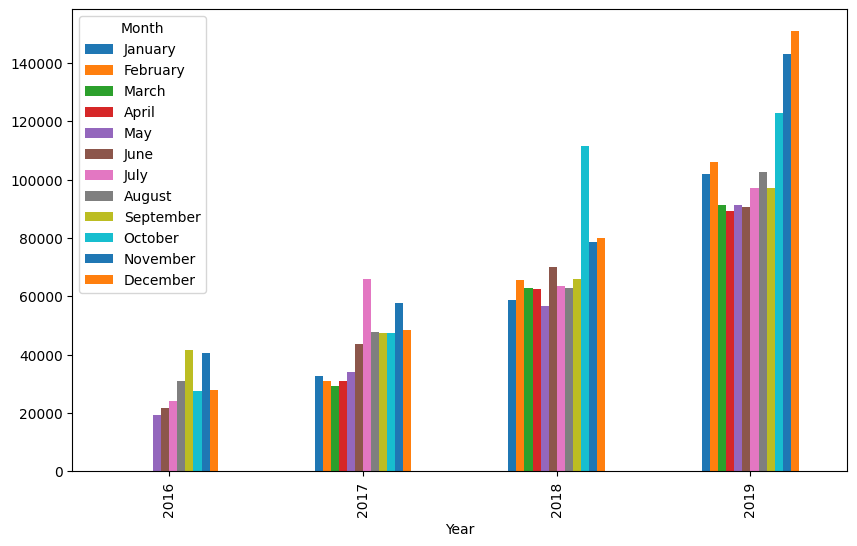

In [67]:
fig = grouped_df.plot(kind = 'bar', figsize = (10, 6))

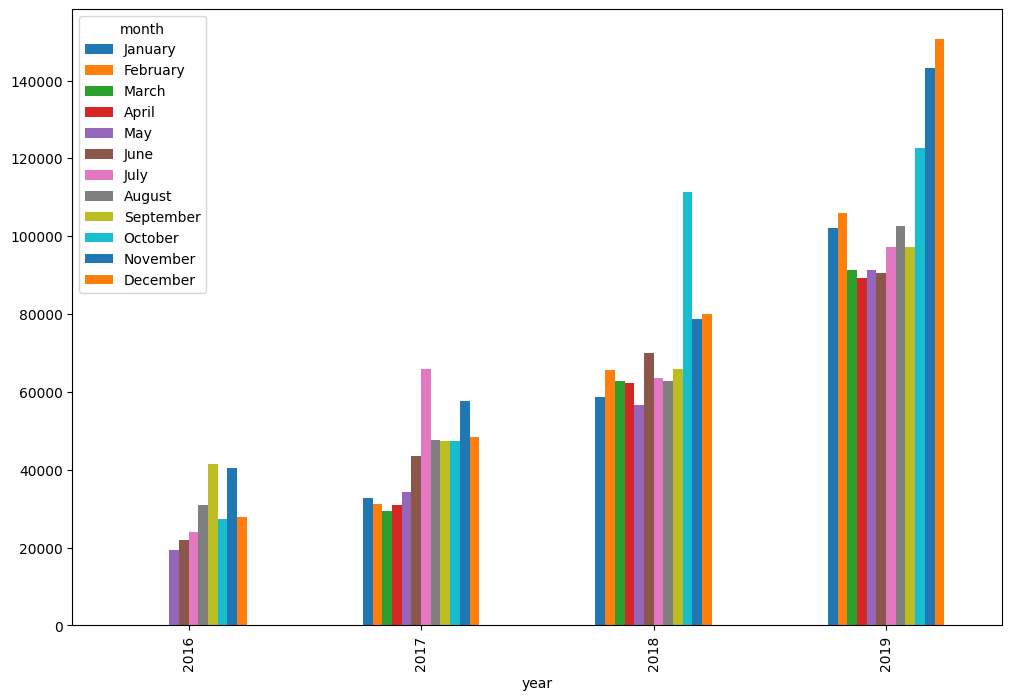

In [71]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    df_bar['month'] = pd.Categorical(df_bar['month'], categories= month_order, ordered= True)
    
    df_bar = df_bar.groupby(['year', 'month'], observed = True)['value'].mean().unstack()

    # Draw bar plot

    ax = df_bar.plot(kind = 'bar', figsize = (12, 8))

    fig = ax.get_figure()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')


draw_bar_plot()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.float = float  # Temporary patch for deprecated np.float
import seaborn as sns

# Import data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & 
        (df['value'] < df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')  # <- test expects this exact string
    ax.set_ylabel('Page Views')  # <- test expects this exact string
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    # Prepare data for bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Ensure month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December']
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=month_order, ordered=True)

    # Group and pivot
    df_grouped = df_bar.groupby(['year', 'month'], observed=True)['value'].mean().unstack()

    # Plot
    fig = df_grouped.plot(kind='bar', figsize=(12, 8)).get_figure()
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    # Prepare boxplot data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Sort month order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

    # Draw box plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')  # <- this is what test expects
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')  # <- this is what test expects
    axes[1].set_ylabel('Page Views')

    fig.savefig('box_plot.png')
    return fig
